# Практика к курсовой работе Мамедова Лейла ПИ19-2

В этом проекте я использовала набор данных о [сердечно-сосудистых заболеваниях](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) от kaggle. Основываясь на некоторых сведения состояния здоровья человека, моя модель предскажет, есть ли у него какие-либо сердечно-сосудистые заболевания или нет.

**Данные:**

Здесь 3 типа данных:

* Objective: фактическая информация;
* Examination: результаты медицинского освидетельствования;
* Subjective: информация, предоставленная пациентом. 
______________________________________________________________________________________________________________________

* Возраст | Objective Feature | age | int (дни) |
* Рост | Objective Feature | height | int (cm) |
* Вес | Objective Feature | weight | float (kg) |
* Пол | Objective Feature | gender | категориальный код |
* Систолическое артериальное давление (верхнее) | Examination Feature | ap_hi | int |
* Диастолическое артериальное давление (нижнее) | Examination Feature | ap_lo | int |
* Холестерин | Examination Feature | cholesterol | 1: норма, 2: выше нормы, 3: намного выше нормы |
* Глюкоза | Examination Feature | gluc | 1: норма, 2: выше нормы, 3: намного выше нормы |
* Курение | Subjective Feature | smoke | бинарный |
* Употребление алкоголя | Subjective Feature | alco | бинарный |
* Физическая активность | Subjective Feature | active | бинарный |
* Наличие или отсутствие сердечно-сосудистых заболеваний | Target Variable | cardio | бинарный |

In [1]:
# Импортируем базовые библиотеки
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv('cardio_train.csv', sep=';')

# Проверим датасет
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [2]:
raw_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
print(f"Наличие пустых значений: {raw_data.isnull().sum().any()}")

Наличие пустых значений: False


* В датасете отсутствуют пустые значения.
* Удалим колонку с id, т. к. к результату она не относится.
* Преобразуем возраст в днях в возраст в годах.
* Гендерный признак не следует классифицировать как 1 и 2, потому что 2 всегда численно больше, чем 1, модель будет учитывать это. Преобразуем в 0 и 1 (мужчины - 0, женщины - 1).
* Найдем и удалим дубликаты записей.

In [4]:
raw_data.drop('id', axis=1, inplace=True)
raw_data.age = np.round(raw_data.age / 365.25, decimals = 1)
raw_data.gender = raw_data.gender.replace(2, 0)

In [5]:
raw_data.duplicated().sum()

674

In [6]:
raw_data.drop_duplicates(inplace=True)

In [7]:
raw_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,0,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1
3,48.2,0,169,82.0,150,100,1,1,0,0,1,1
4,47.8,1,156,56.0,100,60,1,1,0,0,0,0


# Анализ данных и подготовка 

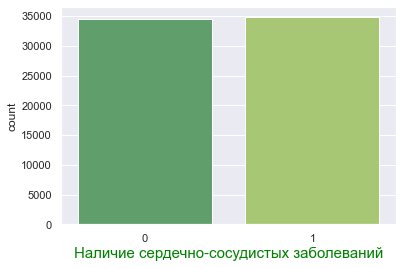

In [8]:
sns.set_style('darkgrid')
sns.countplot(raw_data.cardio,palette='summer')
plt.xlabel('Наличие сердечно-сосудистых заболеваний', fontdict={'fontsize': 15, 'color':'Green'}, labelpad=3);

Итак, данные почти сбалансированы. Давайте посмотрим, у людей какого пола больше случаев заболевания. 

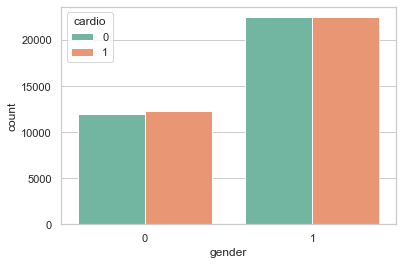

In [9]:
sns.set_style('whitegrid')
sns.countplot(raw_data.gender, hue=raw_data.cardio, palette="Set2");

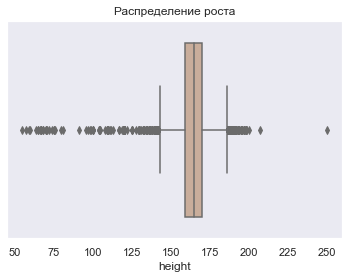

In [10]:
sns.set_style('dark')
sns.boxplot(raw_data.height,palette='pink')
plt.title('Распределение роста');

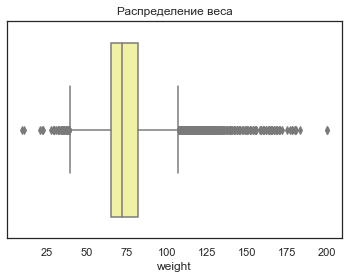

In [11]:
sns.set_style('white')
sns.boxplot(raw_data.weight,palette='terrain')
plt.title('Распределение веса');

Уберем крайне редкие случаи роста и веса. Поскольку данных достаточно много, при моделировании проблем не возникнет.

In [12]:
raw_data = raw_data[(raw_data['height'] < 250) & (raw_data['weight'] > 20.0)]

Так как отклонений много, создадим колонку bmi (индекс массы тела).

In [13]:
raw_data["bmi"] = (raw_data["weight"] / (raw_data["height"] / 100) ** 2).round(1)

In [14]:
raw_data[raw_data['bmi'] < 10]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
26806,63.7,1,157,23.0,110,80,1,1,0,0,1,0,9.3
29488,55.9,0,177,22.0,120,80,1,1,1,1,1,0,7.0
60188,59.8,1,162,21.0,120,80,2,1,0,0,1,1,8.0
60699,51.7,1,171,29.0,110,70,2,1,0,0,1,1,9.9


In [15]:
raw_data[raw_data['bmi'] > 100].sort_values(by='weight', ascending = False).head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
27384,41.9,1,80,178.0,140,90,3,3,0,0,1,1,278.1
8171,48.3,0,97,170.0,160,100,1,1,1,0,1,1,180.7
12770,53.6,1,75,168.0,120,80,1,1,1,0,1,1,298.7
15366,47.7,1,125,167.0,180,90,1,2,0,0,1,1,106.9
20028,54.1,1,112,167.0,180,120,1,1,0,1,1,0,133.1


Далее удалим людей со слишком маленьким весом и наоборот с слишком большим, потому что такие случаи невозможны. Например, есть записи с ростом 80 см и весом 178 кг, что совершенно невозможно. Возможно, это опечатка. Кроме того, состояние здоровья карликов и аномально высоких людей отличаются, поэтому не будем их включать.

In [16]:
data = raw_data[(raw_data['bmi'] > 10) & (raw_data['bmi'] < 100)].copy()

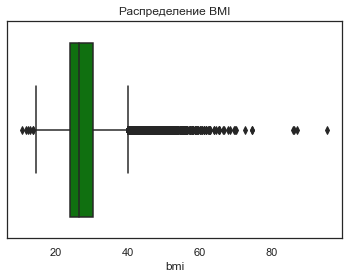

In [17]:
sns.boxplot(data.bmi, color='Green')
plt.title('Распределение BMI');

In [18]:
data.drop(['weight', 'height'], axis=1, inplace=True)

Наблюдения были зарегистрированы в основном у людей в возрасте от 40 до 65 лет.


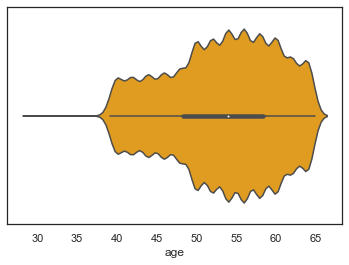

In [19]:
sns.violinplot(data.age, color = 'orange')
print("Наблюдения были зарегистрированы в основном у людей в возрасте от 40 до 65 лет.");

Теперь уберем аномальные значения артериального давления.

In [20]:
(data['ap_lo'] > 360).sum()

952

In [21]:
(data['ap_hi'] > 360).sum()

39

In [22]:
data= data[(data['ap_lo'] < 360) & (data['ap_hi'] < 360)].copy()
data= data[(data['ap_lo'] > 20) & (data['ap_hi'] > 20)].copy()
data=data[data['ap_hi'] > data['ap_lo']]

Распределение верхнего артериального давления


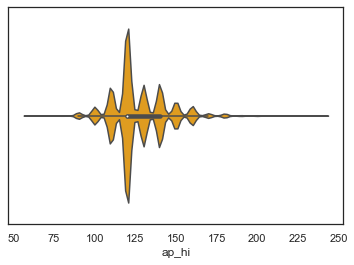

In [23]:
sns.violinplot(data.ap_hi, color='orange');
print('Распределение верхнего артериального давления')

Распределение нижнего артериального давления


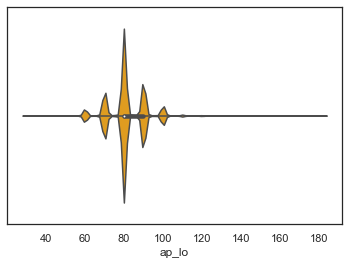

In [24]:
sns.violinplot(data.ap_lo, color='orange');
print('Распределение нижнего артериального давления')

In [25]:
# Создадим упрощенные колонки холестерина и глюкозы
data['cholesterol'] = data['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
data['gluc'] = data['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
dummies = pd.get_dummies(data[['cholesterol','gluc']], drop_first = True)
final_data = pd.concat([data, dummies], axis=1)
final_data.drop(['cholesterol', 'gluc'], axis=1, inplace=True)
final_data.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
0,50.4,0,110,80,0,0,1,0,22.0,1,0,1,0
1,55.4,1,140,90,0,0,1,1,34.9,0,1,1,0
2,51.6,1,130,70,0,0,0,1,23.5,0,1,1,0
3,48.2,0,150,100,0,0,1,1,28.7,1,0,1,0
4,47.8,1,100,60,0,0,0,0,23.0,1,0,1,0


<AxesSubplot:>

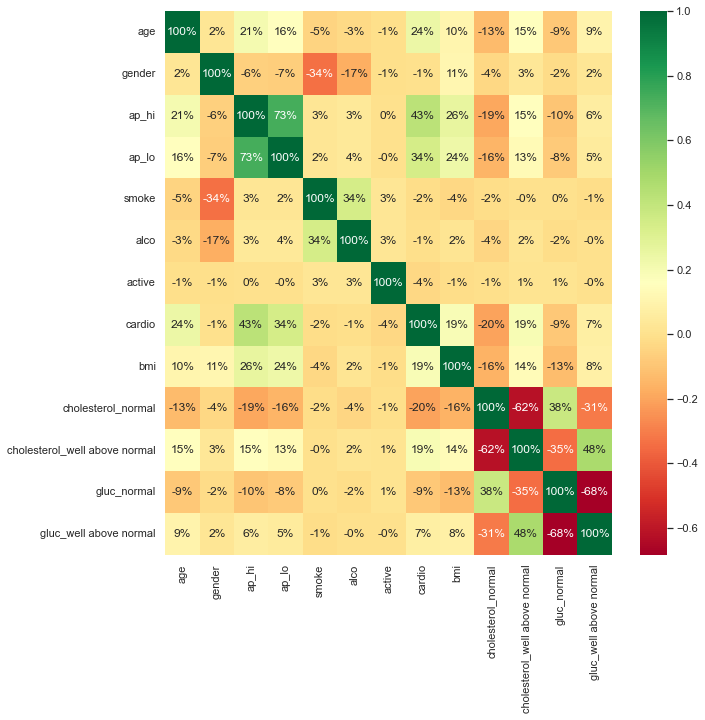

In [26]:
# Посмотрим на корреляцию
plt.figure(figsize=(10,10))
sns.heatmap(final_data.corr(), annot=True, fmt='.0%', cmap='RdYlGn')

### Разделение и стандартизация данных

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(final_data.drop('cardio', axis=1), final_data.cardio, test_size=0.30)

# Возьмем только те колонки, которые имеют влияние на результат
to_be_scaled_feat = ['age', 'ap_hi', 'ap_lo','bmi']
other_feat = ['gender', 'cholesterol_normal', 'cholesterol_well above normal',
       'gluc_normal', 'gluc_well above normal', 'smoke', 'alco', 'active']

scaler = StandardScaler()
scaler.fit(X_train[to_be_scaled_feat])
X_train[to_be_scaled_feat] = scaler.transform(X_train[to_be_scaled_feat])
X_test[to_be_scaled_feat] = scaler.transform(X_test[to_be_scaled_feat])

### Моделирование

In [28]:
# Импортируем библиотеки для построения моделей
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'GaussianNB' : GaussianNB(),
    'BaggingClassifier': BaggingClassifier()
}
results = pd.DataFrame(columns=['Точность в %', 'F1-score'])
for method, func in classifiers.items():
    func.fit(X_train, y_train)
    pred = func.predict(X_test)
    results.loc[method]= [100 * np.round(accuracy_score(y_test, pred), decimals = 4),
                         round(f1_score(y_test,pred), 2)]
results

,Точность в %,F1-score
Logistic Regression,72.90,0.71
Decision Tree,63.18,0.63
Random Forest,69.53,0.69
Support Vector Machines,73.49,0.72
K-nearest Neighbors,69.61,0.69
GaussianNB,68.91,0.64
BaggingClassifier,68.13,0.67


# Усовершенствование моделей  с помощью изменения параметров

## K-Nearest Neighbors (метод локтя)

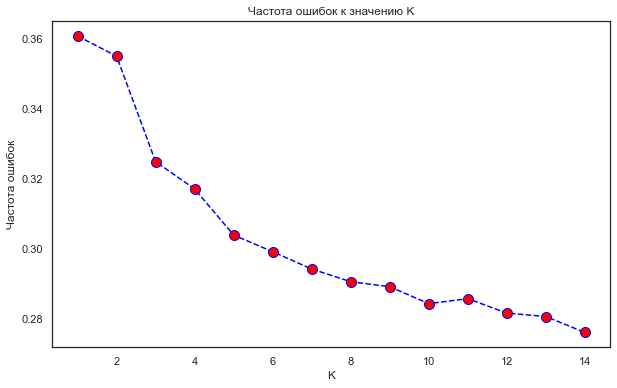

In [29]:
error_rate = []

for i in range(1, 15):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize = 10)
plt.title('Частота ошибок к значению K')
plt.xlabel('K')
plt.ylabel('Частота ошибок');

In [30]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74     10400
           1       0.74      0.66      0.70      9992

    accuracy                           0.72     20392
   macro avg       0.72      0.72      0.72     20392
weighted avg       0.72      0.72      0.72     20392



In [31]:
results.loc['K-nearest Neighbors(Улучш.)'] = [100 * np.round(accuracy_score(y_test, knn_pred), decimals = 4),
                         round(f1_score(y_test, knn_pred), 2)]

Используя **метод локтя**, мы увеличили точность этой модели с 69% до 72%.

## Random Forest (GridSearchCV)

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [33]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10400
           1       0.74      0.70      0.72      9992

    accuracy                           0.73     20392
   macro avg       0.73      0.73      0.73     20392
weighted avg       0.73      0.73      0.73     20392



In [34]:
results.loc['Random Forest(Улучш.)'] = [100 * np.round(accuracy_score(y_test, grid_pred), decimals = 4),
                         round(f1_score(y_test,grid_pred), 2)]

In [35]:
results.sort_values(by = 'Точность в %', ascending=False).style.highlight_max()

,Точность в %,F1-score
Support Vector Machines,73.490000,0.720000
Random Forest(Улучш.),73.130000,0.720000
Logistic Regression,72.900000,0.710000
K-nearest Neighbors(Улучш.),71.840000,0.700000
K-nearest Neighbors,69.610000,0.690000
Random Forest,69.530000,0.690000
GaussianNB,68.910000,0.640000
BaggingClassifier,68.130000,0.670000
Decision Tree,63.180000,0.630000


С помощью **GridSearchCV** мы увеличили точность модели с 69% до 73%.

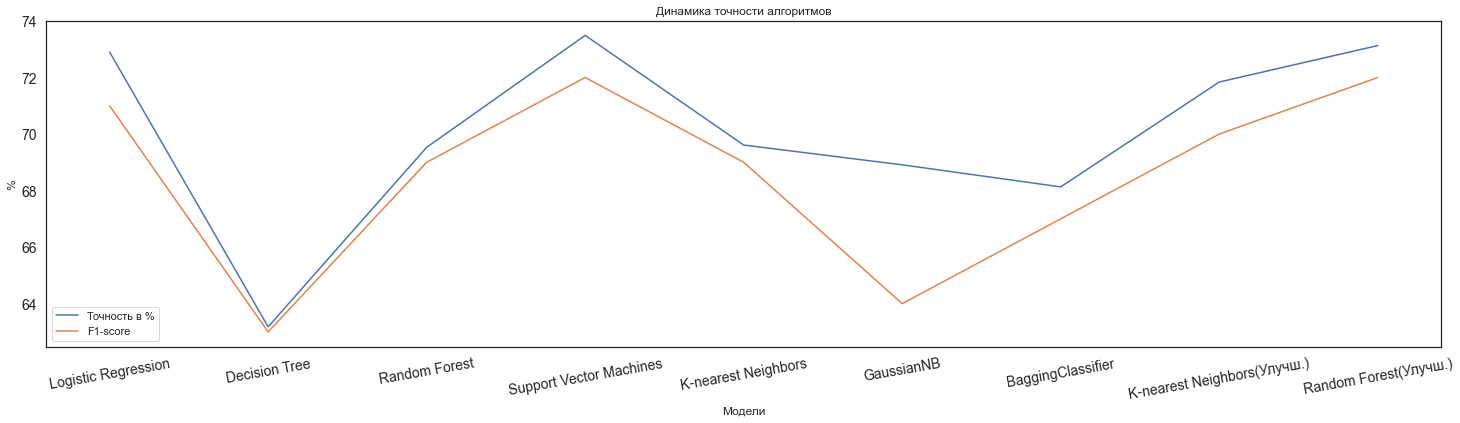

In [37]:
results["F1-score"] = results["F1-score"] * 100
plt.figure(figsize=[25,6])
xx = results.index.values.tolist()
plt.tick_params(labelsize = 14)
plt.plot(xx, results['Точность в %'], label = 'Точность в %')
plt.plot(xx, results['F1-score'], label = 'F1-score')
plt.legend()
plt.title('Динамика точности алгоритмов')
plt.xlabel('Модели')
plt.ylabel('%')
plt.xticks(xx, rotation=10)
plt.savefig('graph.png')
plt.show()